Dataset Head:
   number_courses  time_study   Marks
0               3       4.508  19.202
1               4       0.096   7.734
2               4       3.133  13.811
3               6       7.909  53.018
4               8       7.811  55.299

Columns: ['number_courses', 'time_study', 'Marks']

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00         4

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Best Parameters: {'max_depth': 2, 'n_estimators': 100}


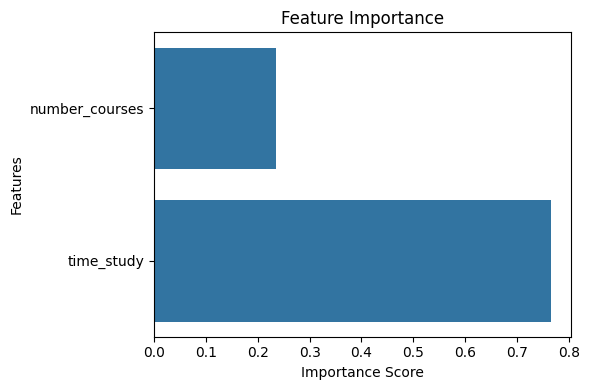

In [22]:
#Section 1: Feature Engineering & Model Tuning
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv(r"C:\Users\Fazal\OneDrive\Desktop\Internship\Task-8\Student_Marks.csv")

# Preview the data
print("Dataset Head:")
print(df.head())

# Check column names
print("\nColumns:", df.columns.tolist())

# Convert Marks to Pass/Fail (assuming passing mark is 50)
df['Passed'] = df['Marks'].apply(lambda x: 1 if x >= 50 else 0)

# Features and target
X = df[['number_courses', 'time_study']]
y = df['Passed']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest + Grid Search
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 4, 6, None]
}
grid = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

# Best model evaluation
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print(f"Best Parameters: {grid.best_params_}")

# Feature importance plot
feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [21]:
# Section 2: Fraud Detection with Decision Trees
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Load dataset
df = pd.read_csv(r"C:\Users\Fazal\OneDrive\Desktop\Internship\Task-8\fraud_detection.csv")

# Display the first few rows
print(df.head())

# Inspect & preprocess
print(df.isnull().sum())

# Encode 'TransactionType' column
le = LabelEncoder()
df['Type_encoded'] = le.fit_transform(df['TransactionType'])

# Feature Engineering: Example feature
df['Amount_log'] = df['TransactionAmount'].apply(lambda x: np.log1p(x))

# Create Is_Fraud column based on basic rules
amount_threshold = df['TransactionAmount'].quantile(0.98)

df['Is_Fraud'] = (
    (df['TransactionAmount'] > amount_threshold) |
    (df['LoginAttempts'] > 3) |
    (df['TransactionDuration'] < 5)
).astype(int)

# Check how many fraud cases were created
print(df['Is_Fraud'].value_counts())

# Features & target
features = ['TransactionAmount', 'Type_encoded', 'Amount_log']
X = df[features]
y = df['Is_Fraud']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("\nFraud Detection Report:\n")
print(classification_report(y_test, y_pred))

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 